In [11]:
#LD morning phase quantification
import numpy as np
from scipy.signal import savgol_filter, find_peaks
import pandas as pd
import matplotlib.pyplot as plt

#locomotor_input = '/Users/donglinhan/Desktop/New New MozzieBox analysis/1min_by_Genotype/Line1Het_LD_only_1min.xlsx'
locomotor_input = '/Users/donglinhan/Desktop/New New MozzieBox analysis/1min_by_Genotype/Line1Hom_LD_only_1min.xlsx'
#locomotor_input = '/Users/donglinhan/Desktop/New New MozzieBox analysis/1min_by_Genotype/WT_LD_only_1min.xlsx'

locomotor_data = pd.read_excel(locomotor_input)
total_n = 40
starting_column = 1
end_column = total_n + 1

all_peaks = pd.DataFrame()

window_start = 2760
window_end = 3300
peak_list = []

for i in range(starting_column, end_column):
    raw_data = locomotor_data.iloc[window_start:window_end, i]
    smoothed_data = savgol_filter(raw_data, window_length=361, polyorder=3)
    peaks, _ = find_peaks(smoothed_data)
    sorted_peaks = sorted(peaks, key=lambda p: smoothed_data[p], reverse=True)
    if sorted_peaks:
        highest_peak_index = sorted_peaks[0]
    if not sorted_peaks: 
        highest_peak_index = pd.NA
    #highest_peak_index = np.argmax(smoothed_data) 
    if raw_data.max() < 5 or raw_data.sum() < 100:
        highest_peak_index = pd.NA
    ZT_time = highest_peak_index * (1/60) - 2
    peak_list.append(ZT_time)
all_peaks[locomotor_input] = pd.Series(peak_list)

print(all_peaks)
all_peaks.to_excel('Hom_morning_peaks.xlsx', index=False)
#all_peaks.to_excel('Het_morning_peaks.xlsx', index=False)
#all_peaks.to_excel('WT_morning_peaks.xlsx', index=False)

   /Users/donglinhan/Desktop/New New MozzieBox analysis/1min_by_Genotype/Line1Hom_LD_only_1min.xlsx
0                                                3.75                                              
1                                            1.633333                                              
2                                            3.133333                                              
3                                            6.533333                                              
4                                            3.433333                                              
5                                            3.916667                                              
6                                            3.416667                                              
7                                                 4.1                                              
8                                                5.35                                              


In [256]:
#DD phase quantification
import numpy as np
from scipy.signal import savgol_filter, find_peaks
import pandas as pd
import matplotlib.pyplot as plt

locomotor_input = '/Users/donglinhan/Desktop/New New MozzieBox analysis/phaseR/line1hom_LDDD_1_n=24.xlsx'
#locomotor_input = '/Users/donglinhan/Desktop/New New MozzieBox analysis/phaseR/line1het_LDDD_1_n=32.xlsx'
#locomotor_input = '/Users/donglinhan/Desktop/New New MozzieBox analysis/phaseR/line1het_LDDD_2_n=15.xlsx'
#locomotor_input = '/Users/donglinhan/Desktop/New New MozzieBox analysis/phaseR/WT_LDDD_1_n=32.xlsx'
#locomotor_input = '/Users/donglinhan/Desktop/New New MozzieBox analysis/phaseR/WT_LDDD_2_n=8.xlsx'
locomotor_data = pd.read_excel(locomotor_input)
valid_n = 24
starting_column = 10 
end_column = starting_column + valid_n

all_peaks = pd.DataFrame()

for d in range(0, 7): 
    DD_start = 4320 + (d * 1440)
    DD_end = 5759 + (d * 1440)
    peak_list = []

    for i in range(starting_column, end_column):
        raw_data = locomotor_data.iloc[DD_start:DD_end, i]
        smoothed_data = savgol_filter(raw_data, window_length=361, polyorder=3)
        peaks, _ = find_peaks(smoothed_data)
        sorted_peaks = sorted(peaks, key=lambda p: smoothed_data[p], reverse=True)
        if sorted_peaks:
            highest_peak_index = sorted_peaks[0]
        if not sorted_peaks: 
            highest_peak_index = pd.NA
        #highest_peak_index = np.argmax(smoothed_data) 
        if raw_data.max() < 5 or raw_data.sum() < 100:
            highest_peak_index = pd.NA
        CT_time = highest_peak_index * (1/60)
        peak_list.append(CT_time)
    all_peaks[d] = pd.Series(peak_list)

print(all_peaks)
all_peaks.to_excel('Hom_1_24_DDpeaks.xlsx', index=False)
#all_peaks.to_excel('Het_1_32_DDpeaks.xlsx', index=False)
#all_peaks.to_excel('Het_2_15_DDpeaks.xlsx', index=False)
#all_peaks.to_excel('WT_1_32_DDpeaks.xlsx', index=False)
#all_peaks.to_excel('WT_2_8_DDpeaks.xlsx', index=False)

            0          1          2          3          4          5  \
0        <NA>      10.05  14.566667   1.650000   1.983333  18.200000   
1    2.116667       <NA>  22.216667   6.766667  23.316667  20.183333   
2        <NA>       21.9  18.333333   4.450000   1.816667  21.383333   
3    9.266667        3.0  13.516667   1.750000  20.700000  15.866667   
4        <NA>  17.533333   1.266667  23.016667  23.166667  18.350000   
5   17.083333        4.2       <NA>  20.800000  14.816667  15.016667   
6   17.583333       <NA>       <NA>   1.766667   1.200000   7.366667   
7    1.683333  23.233333      22.25   2.733333  21.900000  20.166667   
8        13.4  20.766667  21.766667  16.750000  17.150000   1.600000   
9        <NA>       <NA>       <NA>  22.850000  23.933333  20.666667   
10  22.983333   9.366667  10.283333   4.433333   1.266667   1.000000   
11  10.666667      16.15       15.8  10.783333  22.583333   3.000000   
12       <NA>       <NA>       <NA>  15.933333  16.433333  19.88

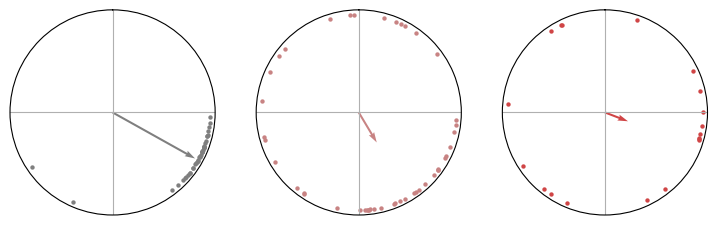

0.8481156321787295 2.7600336782122218e-21
0.11658744384890574 0.0042281764955491045
0.05799002595881485 0.3366349224330666


In [4]:
## DD circ stats analysis

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import circmean, rayleigh
from pingouin import circ_rayleigh, circ_r, circ_mean, plot_circmean
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

peak_input = '/Users/donglinhan/Desktop/New New MozzieBox analysis/All_DDpeaks.xlsx'
all_peaks = pd.read_excel(peak_input)

# Create rose plot
plot_width = 3
plot_height = 3
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(3*plot_width, 1*plot_height), subplot_kw=dict(projection='polar'))
bin_start = np.radians (0)
bin_end = np.radians (360)

pdf_pages = PdfPages('DD3_rose_plot.pdf')

#DD1
ax = axes [0]
WT_time_values_raw = all_peaks.iloc[:, 2]
WT_time_values = WT_time_values_raw.dropna()
WT_radians = np.radians(np.array(WT_time_values.to_list()) * 360 / 24)
ax.scatter(WT_radians, np.ones_like(WT_radians) * 0.9, color='#7f7f7f',alpha = 1, linewidth = 0, s=10)
mean_direction = - circ_mean(WT_radians) + (np.pi/2)
vector_length = circ_r(WT_radians)
ax.quiver(0, 0, np.cos(mean_direction)*vector_length, np.sin(mean_direction)*vector_length, scale=2, color='#7f7f7f', width=0.01)
ax.set_theta_zero_location('N')
ax.set_rticks([])
ax.set_theta_direction(-1)
# Set labels
hours = []
ax.set_xticks(np.arange(0, 2*np.pi, 2*np.pi/4))
ax.set_xticklabels(hours)

#Het
ax = axes [1]
time_values_raw = all_peaks.iloc[:, 9]
time_values = time_values_raw.dropna()
Het_radians = np.radians(np.array(time_values.to_list()) * 360 / 24)
#ax.hist(Het_radians, bins=24, range = (bin_start, bin_end), color='#c88383', density=True)
ax.scatter(Het_radians, np.ones_like(Het_radians) * 0.9, color='#c88383', alpha = 1, linewidth = 0, s=10)
mean_direction = - circ_mean(Het_radians) + (np.pi/2)
vector_length = circ_r(Het_radians)
ax.quiver(0, 0, np.cos(mean_direction)*vector_length, np.sin(mean_direction)*vector_length, scale=2, color='#c88383', width=0.01)
ax.set_theta_zero_location('N')
ax.set_rticks([])
ax.set_theta_direction(-1)
hours = []
ax.set_xticks(np.arange(0, 2*np.pi, 2*np.pi/4))
ax.set_xticklabels(hours)


#Het
ax = axes [2]
time_values_raw = all_peaks.iloc[:, 16]
time_values = time_values_raw.dropna()
Hom_radians = np.radians(np.array(time_values.to_list()) * 360 / 24)
#ax.hist(Hom_radians, bins=24, range = (bin_start, bin_end), color='#d04546', density=True)
ax.scatter(Hom_radians, np.ones_like(Hom_radians) * 0.9, color='#d04546', alpha = 1, linewidth = 0, s=10)
mean_direction = - circ_mean(Hom_radians) + (np.pi/2)
vector_length = circ_r(Hom_radians)
ax.quiver(0, 0, np.cos(mean_direction)*vector_length, np.sin(mean_direction)*vector_length, scale=2, color='#d04546', width=0.01)

"""combined_radians = np.concatenate((WT_radians, Het_radians, Hom_radians))
colors = []
colors.extend(['#7f7f7f'] * len(WT_radians))
colors.extend(['#c88383'] * len(Het_radians))
colors.extend(['#d04546'] * len(Hom_radians))
ax.scatter(combined_radians, np.ones_like(combined_radians) * ax.get_ylim()[1], color=colors, s=10, zorder=10, alpha=0.5)
"""

# Set zero angle to the top
ax.set_theta_zero_location('N')
ax.set_rticks([])
# Set clockwise direction
ax.set_theta_direction(-1)
# Set labels
hours = []
ax.set_xticks(np.arange(0, 2*np.pi, 2*np.pi/4))
ax.set_xticklabels(hours)

#plt.title('Circular Histogram of Time Values')
plt.show()

pdf_pages.savefig(fig, bbox_inches='tight')
pdf_pages.close()


z, pval = circ_rayleigh(WT_radians)
r = z / len(WT_radians)
print (r, pval)

z, pval = circ_rayleigh(Het_radians)
r = z / len(Het_radians)
print (r, pval)

z, pval = circ_rayleigh(Hom_radians, d = 2*np.pi/24)
r = z / len(Hom_radians)
print (r, pval)

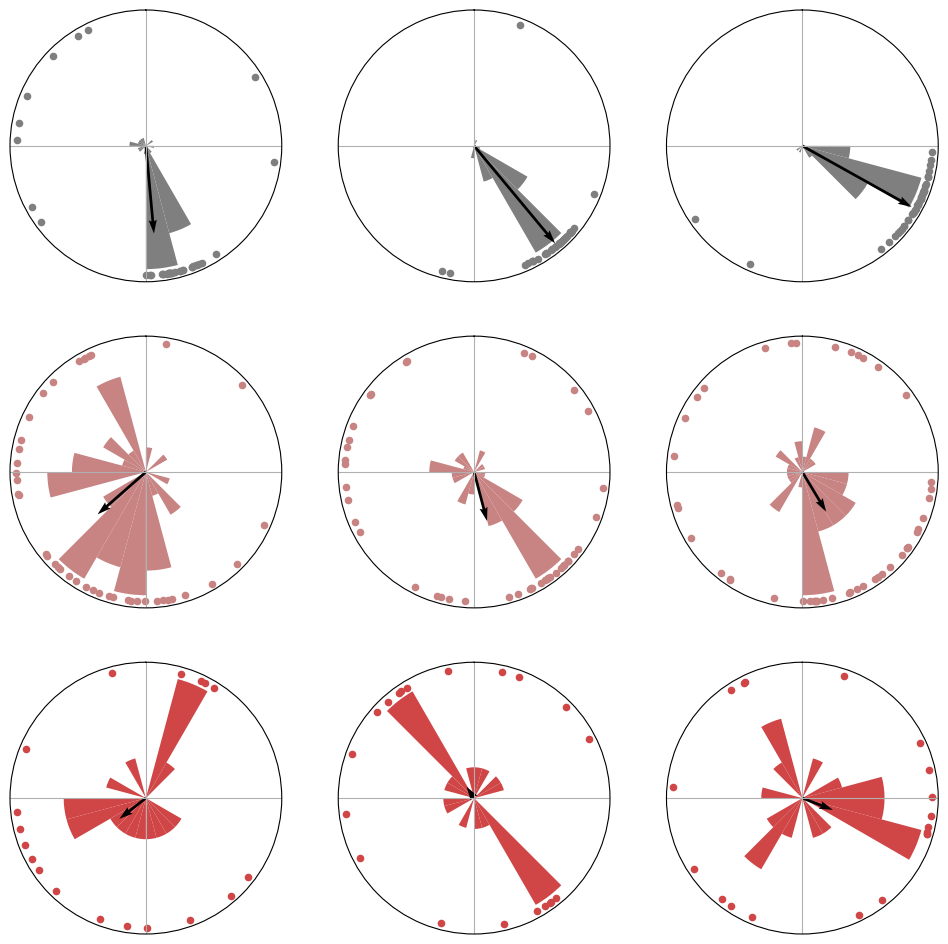

0.8481156321787295 2.7600336782122218e-21
0.11658744384890574 0.0042281764955491045
0.05799002595881485 0.3366349224330666


In [309]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import circmean, rayleigh
from pingouin import circ_rayleigh, circ_r, circ_mean, plot_circmean
from matplotlib.backends.backend_pdf import PdfPages

peak_input = '/Users/donglinhan/Desktop/New New MozzieBox analysis/All_DDpeaks.xlsx'
all_peaks = pd.read_excel(peak_input)
# Create rose plot
plot_width = 4
plot_height = 4
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(3*plot_width, 3*plot_height), subplot_kw=dict(projection='polar'))
bin_start = np.radians (0)
bin_end = np.radians (360)
pdf_pages = PdfPages('DD_rose_plots.pdf')

#WT
ax = axes [0, 0]
time_values_raw = all_peaks.iloc[:, 0]
time_values = time_values_raw.dropna()
WT_radians = np.radians(np.array(time_values.to_list()) * 360 / 24)
ax.hist(WT_radians, bins=24, range = (bin_start, bin_end), color='#7f7f7f', density=True)
ax.scatter(WT_radians, np.ones_like(WT_radians) * ax.get_ylim()[1], color='#7f7f7f', s=20)
mean_direction = - circ_mean(WT_radians) + (np.pi/2)
vector_length = circ_r(WT_radians)
ax.quiver(0, 0, np.cos(mean_direction)*vector_length, np.sin(mean_direction)*vector_length, scale=2, color='black', width=0.01)
ax.set_theta_zero_location('N')
ax.set_rticks([])
ax.set_theta_direction(-1)
hours = []
ax.set_xticks(np.arange(0, 2*np.pi, 2*np.pi/4))
ax.set_xticklabels(hours)

ax = axes [0, 1]
time_values_raw = all_peaks.iloc[:, 1]
time_values = time_values_raw.dropna()
WT_radians = np.radians(np.array(time_values.to_list()) * 360 / 24)
ax.hist(WT_radians, bins=24, range = (bin_start, bin_end), color='#7f7f7f', density=True)
ax.scatter(WT_radians, np.ones_like(WT_radians) * ax.get_ylim()[1], color='#7f7f7f', s=20)
mean_direction = - circ_mean(WT_radians) + (np.pi/2)
vector_length = circ_r(WT_radians)
ax.quiver(0, 0, np.cos(mean_direction)*vector_length, np.sin(mean_direction)*vector_length, scale=2, color='black', width=0.01)
ax.set_theta_zero_location('N')
ax.set_rticks([])
ax.set_theta_direction(-1)
hours = []
ax.set_xticks(np.arange(0, 2*np.pi, 2*np.pi/4))
ax.set_xticklabels(hours)

ax = axes [0, 2]
time_values_raw = all_peaks.iloc[:, 2]
time_values = time_values_raw.dropna()
WT_radians = np.radians(np.array(time_values.to_list()) * 360 / 24)
ax.hist(WT_radians, bins=24, range = (bin_start, bin_end), color='#7f7f7f', density=True)
ax.scatter(WT_radians, np.ones_like(WT_radians) * ax.get_ylim()[1], color='#7f7f7f', s=20)
mean_direction = - circ_mean(WT_radians) + (np.pi/2)
vector_length = circ_r(WT_radians)
ax.quiver(0, 0, np.cos(mean_direction)*vector_length, np.sin(mean_direction)*vector_length, scale=2, color='black', width=0.01)
ax.set_theta_zero_location('N')
ax.set_rticks([])
ax.set_theta_direction(-1)
hours = []
ax.set_xticks(np.arange(0, 2*np.pi, 2*np.pi/4))
ax.set_xticklabels(hours)

#Het
ax = axes [1, 0]
time_values_raw = all_peaks.iloc[:, 7]
time_values = time_values_raw.dropna()
Het_radians = np.radians(np.array(time_values.to_list()) * 360 / 24)
ax.hist(Het_radians, bins=24, range = (bin_start, bin_end), color='#c88383', density=True)
ax.scatter(Het_radians, np.ones_like(Het_radians) * ax.get_ylim()[1], color='#c88383', s=20)
mean_direction = - circ_mean(Het_radians) + (np.pi/2)
vector_length = circ_r(Het_radians)
ax.quiver(0, 0, np.cos(mean_direction)*vector_length, np.sin(mean_direction)*vector_length, scale=2, color='black', width=0.01)
ax.set_theta_zero_location('N')
ax.set_rticks([])
ax.set_theta_direction(-1)
hours = []
ax.set_xticks(np.arange(0, 2*np.pi, 2*np.pi/4))
ax.set_xticklabels(hours)

ax = axes [1, 1]
time_values_raw = all_peaks.iloc[:, 8]
time_values = time_values_raw.dropna()
Het_radians = np.radians(np.array(time_values.to_list()) * 360 / 24)
ax.hist(Het_radians, bins=24, range = (bin_start, bin_end), color='#c88383', density=True)
ax.scatter(Het_radians, np.ones_like(Het_radians) * ax.get_ylim()[1], color='#c88383', s=20)
mean_direction = - circ_mean(Het_radians) + (np.pi/2)
vector_length = circ_r(Het_radians)
ax.quiver(0, 0, np.cos(mean_direction)*vector_length, np.sin(mean_direction)*vector_length, scale=2, color='black', width=0.01)
ax.set_theta_zero_location('N')
ax.set_rticks([])
ax.set_theta_direction(-1)
hours = []
ax.set_xticks(np.arange(0, 2*np.pi, 2*np.pi/4))
ax.set_xticklabels(hours)

ax = axes [1, 2]
time_values_raw = all_peaks.iloc[:, 9]
time_values = time_values_raw.dropna()
Het_radians = np.radians(np.array(time_values.to_list()) * 360 / 24)
ax.hist(Het_radians, bins=24, range = (bin_start, bin_end), color='#c88383', density=True)
ax.scatter(Het_radians, np.ones_like(Het_radians) * ax.get_ylim()[1], color='#c88383', s=20)
mean_direction = - circ_mean(Het_radians) + (np.pi/2)
vector_length = circ_r(Het_radians)
ax.quiver(0, 0, np.cos(mean_direction)*vector_length, np.sin(mean_direction)*vector_length, scale=2, color='black', width=0.01)
ax.set_theta_zero_location('N')
ax.set_rticks([])
ax.set_theta_direction(-1)
hours = []
ax.set_xticks(np.arange(0, 2*np.pi, 2*np.pi/4))
ax.set_xticklabels(hours)


#Het
ax = axes [2,0]
time_values_raw = all_peaks.iloc[:, 14]
time_values = time_values_raw.dropna()
Hom_radians = np.radians(np.array(time_values.to_list()) * 360 / 24)
ax.hist(Hom_radians, bins=24, range = (bin_start, bin_end), color='#d04546', density=True)
ax.scatter(Hom_radians, np.ones_like(Hom_radians) * ax.get_ylim()[1], color='#d04546', s=20)
mean_direction = - circ_mean(Hom_radians) + (np.pi/2)
vector_length = circ_r(Hom_radians)
ax.quiver(0, 0, np.cos(mean_direction)*vector_length, np.sin(mean_direction)*vector_length, scale=2, color='black', width=0.01)
ax.set_theta_zero_location('N')
ax.set_rticks([])
ax.set_theta_direction(-1)
hours = []
ax.set_xticks(np.arange(0, 2*np.pi, 2*np.pi/4))
ax.set_xticklabels(hours)

ax = axes [2,1]
time_values_raw = all_peaks.iloc[:, 15]
time_values = time_values_raw.dropna()
Hom_radians = np.radians(np.array(time_values.to_list()) * 360 / 24)
ax.hist(Hom_radians, bins=24, range = (bin_start, bin_end), color='#d04546', density=True)
ax.scatter(Hom_radians, np.ones_like(Hom_radians) * ax.get_ylim()[1], color='#d04546', s=20)
mean_direction = - circ_mean(Hom_radians) + (np.pi/2)
vector_length = circ_r(Hom_radians)
ax.quiver(0, 0, np.cos(mean_direction)*vector_length, np.sin(mean_direction)*vector_length, scale=2, color='black', width=0.01)
ax.set_theta_zero_location('N')
ax.set_rticks([])
ax.set_theta_direction(-1)
hours = []
ax.set_xticks(np.arange(0, 2*np.pi, 2*np.pi/4))
ax.set_xticklabels(hours)

ax = axes [2,2]
time_values_raw = all_peaks.iloc[:, 16]
time_values = time_values_raw.dropna()
Hom_radians = np.radians(np.array(time_values.to_list()) * 360 / 24)
ax.hist(Hom_radians, bins=24, range = (bin_start, bin_end), color='#d04546', density=True)
ax.scatter(Hom_radians, np.ones_like(Hom_radians) * ax.get_ylim()[1], color='#d04546', s=20)
mean_direction = - circ_mean(Hom_radians) + (np.pi/2)
vector_length = circ_r(Hom_radians)
ax.quiver(0, 0, np.cos(mean_direction)*vector_length, np.sin(mean_direction)*vector_length, scale=2, color='black', width=0.01)
ax.set_theta_zero_location('N')
ax.set_rticks([])
ax.set_theta_direction(-1)
hours = []
ax.set_xticks(np.arange(0, 2*np.pi, 2*np.pi/4))
ax.set_xticklabels(hours)


plt.show()

pdf_pages.savefig(fig, bbox_inches='tight')
pdf_pages.close()